In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm

import seaborn as sns
import pandas as pd

In [2]:
plt.style.use("seaborn-whitegrid")

In [3]:
b1 = [0.9  , 0.955,
      0.993, 1.011, 1.049, 1.086, 1.123,
      1.161, 1.198, 1.235, 1.272, 1.310,
      1.347, 1.384, 1.422, 1.459, 1.496,
      1.526, 1.552, 1.589, 1.618, 1.645,
      1.683, 1.720, 1.757, 1.794, 1.832,
      1.869, 1.906, 1.944, 1.981, 2.0]
b2 = [0.9  , 0.955, 0.993, 1.011, 1.049,
      1.086, 1.123, 1.161, 1.198, 1.235,
      1.272, 1.310, 1.347, 1.384, 1.422,
      1.459, 1.496, 1.526, 1.552, 1.589,
      1.618, 1.645, 1.683, 1.720, 1.757,
      1.794, 1.832, 1.869, 1.906, 1.944,
      1.981, 2.0]
density = np.load("two_field_density.npy")

# Let's check if density when $b_1 = b_2$ is simmilar with regular game

<IPython.core.display.Javascript object>


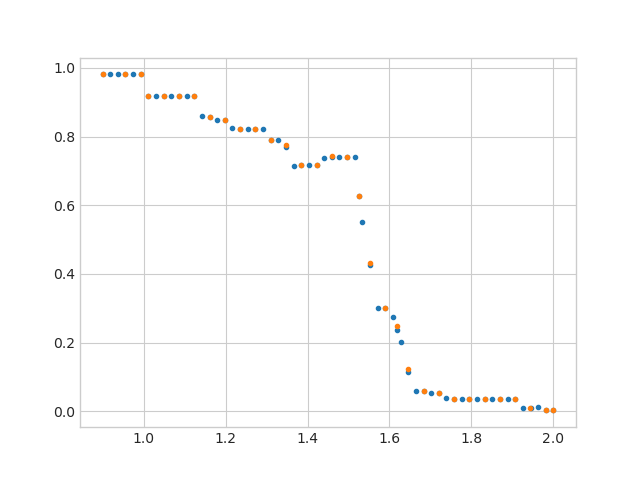

In [4]:
fig = plt.figure()
plt.plot([0.9, 0.91864407, 0.93728814, 0.9559322 , 0.97457627,
     0.99322034, 1.01186441, 1.03050847, 1.04915254, 1.06779661,
     1.08644068, 1.10508475, 1.12372881, 1.14237288, 1.16101695,
     1.17966102, 1.19830508, 1.21694915, 1.23559322, 1.25423729,
     1.27288136, 1.29152542, 1.31016949, 1.32881356, 1.34745763,
     1.36610169, 1.38474576, 1.40338983, 1.4220339 , 1.44067797,
     1.45932203, 1.4779661 , 1.49661017, 1.51525424, 1.526     ,
     1.53389831, 1.55254237, 1.57118644, 1.58983051, 1.60847458,
     1.618     , 1.62711864, 1.64576271, 1.66440678, 1.68305085,
     1.70169492, 1.72033898, 1.73898305, 1.75762712, 1.77627119,
     1.79491525, 1.81355932, 1.83220339, 1.85084746, 1.86949153,
     1.88813559, 1.90677966, 1.92542373, 1.9440678 , 1.96271186,
     1.98135593, 2.0], np.load("data/200MeanGame/density.npy").mean(axis=-1).mean(axis=-1), ".")
plt.plot(b1,density.diagonal(), ".")
plt.show()

# Now let's look at average density for two fields

<IPython.core.display.Javascript object>


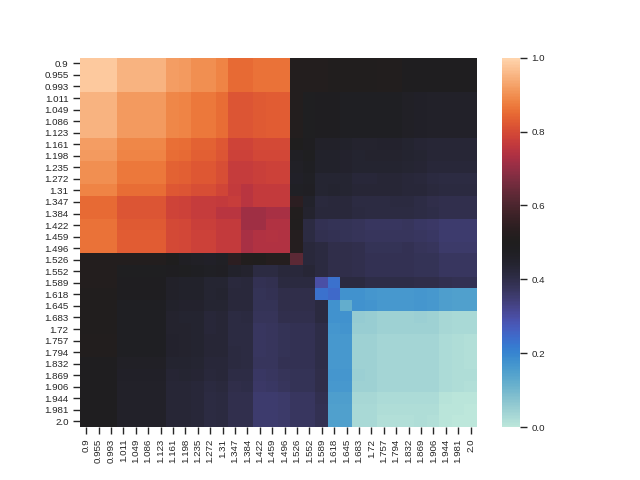

In [31]:
fig = plt.figure()
sns.heatmap(density.mean(axis=-1), vmin=0, vmax=1, center=1/2, xticklabels=b2, yticklabels=b1)
plt.show()

In [12]:
density.shape

(31, 32)

In [32]:
density_old = np.load("data/200MeanGame/density.npy").mean(axis=-1).mean(axis=-1)

In [8]:
density_old

array([0.98099975, 0.98099975, 0.98099975, 0.98099975, 0.98099975,
       0.98099975, 0.91736125, 0.91736125, 0.91736125, 0.91736125,
       0.91736125, 0.91736125, 0.91736125, 0.86107838, 0.85717601,
       0.84792921, 0.84796806, 0.82621206, 0.82292148, 0.82292148,
       0.8218611 , 0.82262344, 0.79056833, 0.79066619, 0.77034445,
       0.71562072, 0.7161845 , 0.71643972, 0.71718876, 0.73810701,
       0.74024709, 0.74140188, 0.74140188, 0.74188985, 0.62619488,
       0.55092497, 0.42637405, 0.29951039, 0.29952249, 0.27418099,
       0.23743979, 0.20198814, 0.11437391, 0.05915973, 0.05835702,
       0.05399745, 0.05399745, 0.0397823 , 0.03471938, 0.03471938,
       0.03471938, 0.03471938, 0.03478686, 0.03559937, 0.03559937,
       0.03567243, 0.03569861, 0.01074671, 0.01074671, 0.01182619,
       0.00357859, 0.00246937])

In [33]:
basic = np.broadcast_to(density_old[::2], (31, 31))

In [34]:
den = (basic+basic.T)/2

<IPython.core.display.Javascript object>


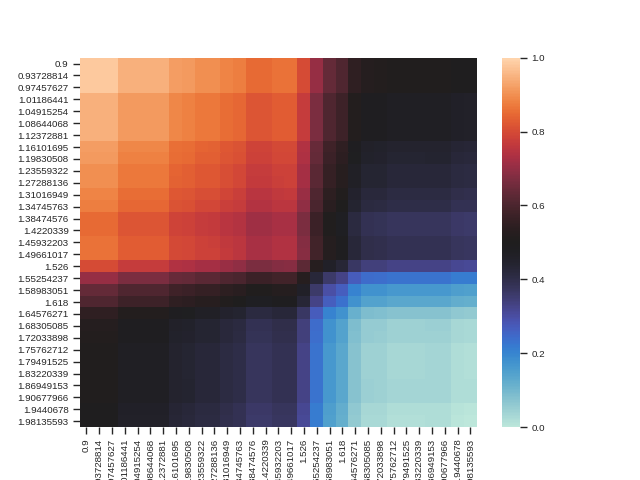

In [35]:
bs = [0.9,        0.91864407, 0.93728814, 0.9559322 , 0.97457627,
                 0.99322034, 1.01186441, 1.03050847, 1.04915254, 1.06779661,
                 1.08644068, 1.10508475, 1.12372881, 1.14237288, 1.16101695,
                 1.17966102, 1.19830508, 1.21694915, 1.23559322, 1.25423729,
                 1.27288136, 1.29152542, 1.31016949, 1.32881356, 1.34745763,
                 1.36610169, 1.38474576, 1.40338983, 1.4220339 , 1.44067797,
                 1.45932203, 1.4779661 , 1.49661017, 1.51525424, 1.526     ,
                 1.53389831, 1.55254237, 1.57118644, 1.58983051, 1.60847458,
                 1.618     , 1.62711864, 1.64576271, 1.66440678, 1.68305085,
                 1.70169492, 1.72033898, 1.73898305, 1.75762712, 1.77627119,
                 1.79491525, 1.81355932, 1.83220339, 1.85084746, 1.86949153,
                 1.88813559, 1.90677966, 1.92542373, 1.9440678 , 1.96271186,
                 1.98135593, 2.0][::2]
fig = plt.figure()
sns.heatmap(den, vmin=0, vmax=1, center=1/2, xticklabels=bs, yticklabels=bs)
plt.show()
del bs

<IPython.core.display.Javascript object>


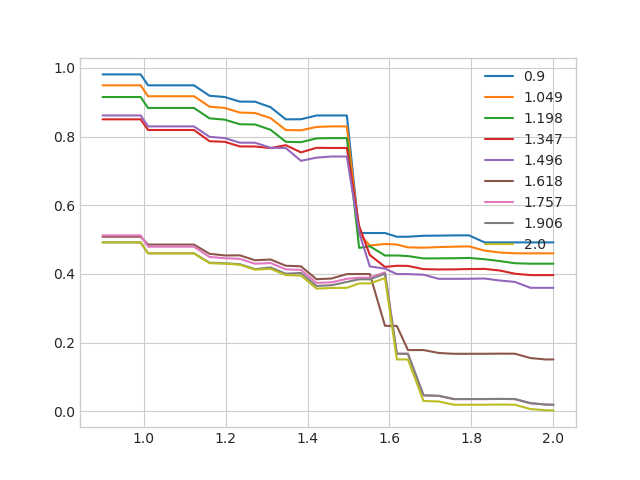

In [22]:
fig = plt.figure()
for i in range(8):
    plt.plot(b2, density[4*i], label=f"{b1[4*i]}")
plt.plot(b2, density[-1], label=f"{b1[-1]}")
plt.legend()
plt.show()

In [17]:
density.shape

(32, 32)

In [24]:
fc = np.linspace(.001, 1, 100)

In [29]:
def dens(b1, b2, n1, m1, n2, m2):
    density = 1/2*(-b2*m1/(b2-1)-b1*m2/(b1-1)+n1/(b2-1)+n2/(b1-1))
    density[density > 1] = 2
    density[density < 0] = -1
    return density.astype("float32")

In [30]:
from tqdm import tqdm

In [80]:
predicted = np.zeros((32, 32), dtype="int32")
for n1 in tqdm(range(9)):
    for n2 in range(9):
        for m1 in range(9):
            for m2 in range(9):
                pred = np.zeros((32, 32), dtype="float32")
                for i in range(32):
                    pred[i] = dens(b1[i], np.array(b2), n1, m1, n2, m2)
                predicted += np.abs(density-pred) < .0004
                if predicted.max() > 6000:
                    print("Error")

100%|██████████| 9/9 [00:09<00:00,  1.10s/it]


In [81]:
predicted.max()

22

In [82]:
predicted[predicted > 0.01] = 1

In [83]:
predicted.sum()/(32*32)

0.05859375

<IPython.core.display.Javascript object>


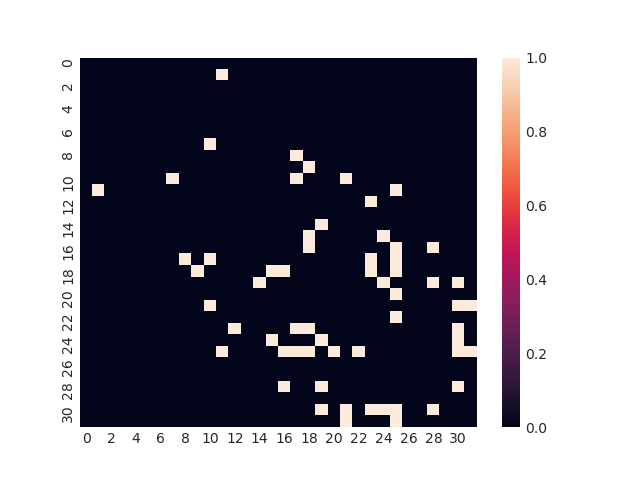

In [85]:
fig = plt.figure()
sns.heatmap(predicted)
plt.show()

In [36]:
from mpl_toolkits.mplot3d import axes3d

<IPython.core.display.Javascript object>


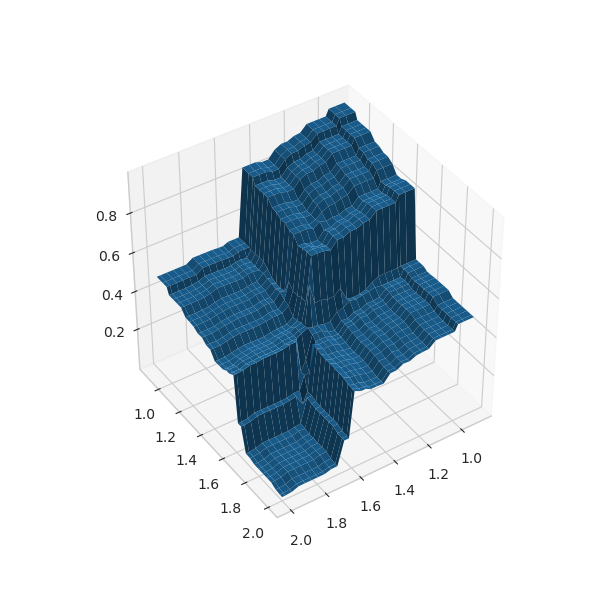

In [87]:
X,Y = np.meshgrid(b1, b2)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, density)


plt.show()

<IPython.core.display.Javascript object>


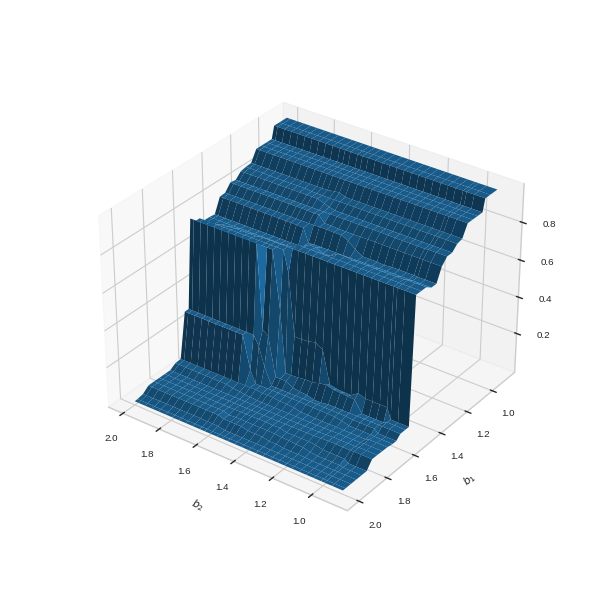

In [41]:
X,Y = np.meshgrid(b1, b2)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, density[..., 0])
ax.set_xlabel("$b_2$")
ax.set_ylabel("$b_1$")

plt.show()

<IPython.core.display.Javascript object>


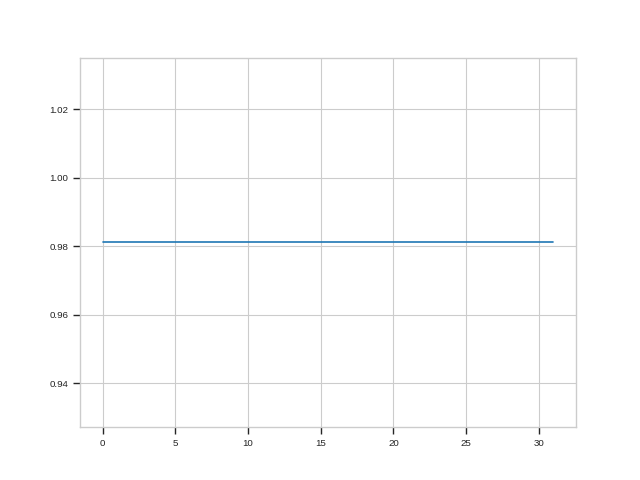

In [40]:
fig = plt.figure()
plt.plot(density[0, ..., 0])

## Two heatmaps

<IPython.core.display.Javascript object>


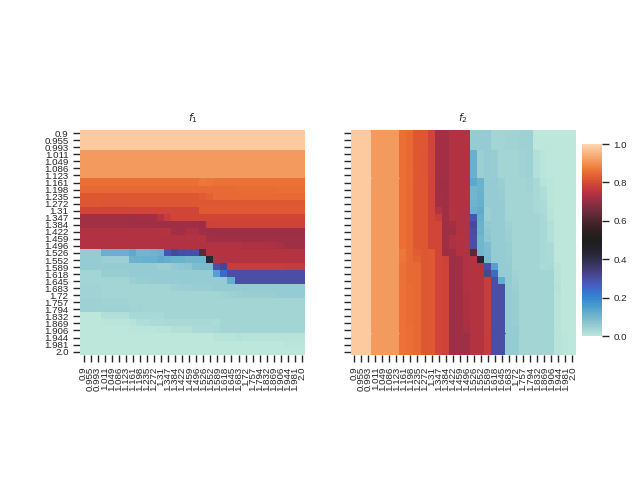

In [28]:
sns.set_context("paper", font_scale=0.8)
grid_kws = {"width_ratios": (.5, .5), "hspace": .3}
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, gridspec_kw=grid_kws)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# ax1.set_box_aspect(1)
# ax2.set_box_aspect(1)
ax1.set_title("$f_1$")
ax2.set_title("$f_2$")
sns.heatmap(density[..., 0], ax=ax1, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=False, square=True)
sns.heatmap(density[..., 1], ax=ax2, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=True, cbar_ax=cbar_ax, square=True)
plt.show()